In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
from io import open

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

In [3]:
import tensorflow as tf

## Convolutional Layers

In [4]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
image = china[150:220, 130:250]
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)

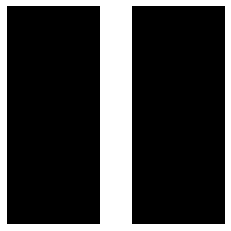

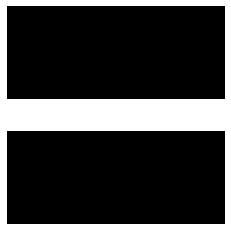

In [5]:
fmap = np.zeros(shape=(7,7,1,2),dtype=np.float32)
#7 structs, each 7 structs, each 1 in 7, each 1 in 7 has 2 elements
#for all structs, where third of seventh struct and the first 
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0, 1] = 1
plot_image(fmap[:, :, 0, 0])
plt.show()
plot_image(fmap[:, :, 0, 1])
plt.show()

In [6]:
np.zeros(shape=(7,7,1,2),dtype=np.float32)

array([[[[0., 0.]],

        [[0., 0.]],

        [[0., 0.]],

        [[0., 0.]],

        [[0., 0.]],

        [[0., 0.]],

        [[0., 0.]]],


       [[[0., 0.]],

        [[0., 0.]],

        [[0., 0.]],

        [[0., 0.]],

        [[0., 0.]],

        [[0., 0.]],

        [[0., 0.]]],


       [[[0., 0.]],

        [[0., 0.]],

        [[0., 0.]],

        [[0., 0.]],

        [[0., 0.]],

        [[0., 0.]],

        [[0., 0.]]],


       [[[0., 0.]],

        [[0., 0.]],

        [[0., 0.]],

        [[0., 0.]],

        [[0., 0.]],

        [[0., 0.]],

        [[0., 0.]]],


       [[[0., 0.]],

        [[0., 0.]],

        [[0., 0.]],

        [[0., 0.]],

        [[0., 0.]],

        [[0., 0.]],

        [[0., 0.]]],


       [[[0., 0.]],

        [[0., 0.]],

        [[0., 0.]],

        [[0., 0.]],

        [[0., 0.]],

        [[0., 0.]],

        [[0., 0.]]],


       [[[0., 0.]],

        [[0., 0.]],

        [[0., 0.]],

        [[0., 0.]],

        [[0., 0.]],

 

In [7]:
fmap[:, :, 0, 0]

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [8]:
fmap[:, :, 0, 1]

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
reset_graph()

X = tf.placeholder(tf.float32,shape=(None, height,width,1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X,feature_maps,strides=[1,1,1,1],padding='SAME')

In [10]:
with tf.Session() as sess:
    output = convolution.eval(feed_dict={X:images})

In [11]:
images.shape

(1, 70, 120, 1)

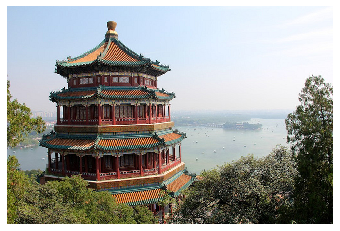

In [12]:
plot_image(china)

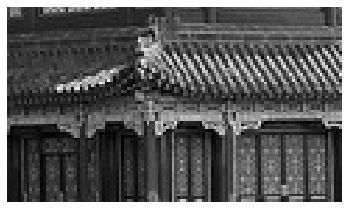

In [13]:
plot_image(image_grayscale)

## plot images after convolution

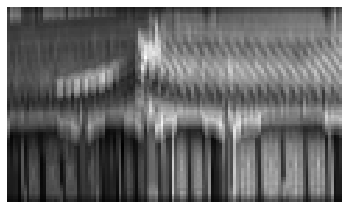

In [14]:
plot_image(output[0, :, :, 0])

In [15]:
output.shape

(1, 70, 120, 2)

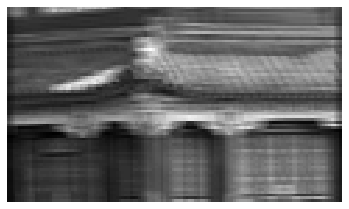

In [16]:
plot_image(output[0, :, :, 1])

In [17]:
type(output)

numpy.ndarray

## Simple example

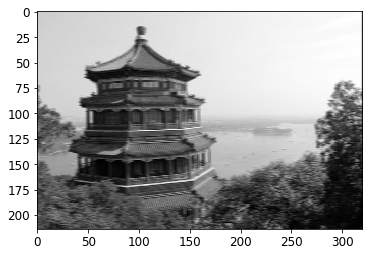

In [18]:
import numpy as np
from sklearn.datasets import load_sample_images

#load sample images
china = load_sample_image('china.jpg')
flower = load_sample_image('flower.jpg')
dataset = np.array([china, flower],dtype=np.float32)
batch_size, height, width, channels = dataset.shape

#create 2 filters, each filter is to be convolved on an nxlxm image, two filters
filters = np.zeros(shape=(7,7,channels,2),dtype=np.float32)
filters[:,3,:,0] = 1 #vertical line
filters[3,:,:,1] = 1 #horizontal line

#create a grpah with input X plus a convolutional layer applying the 2 filters
X = tf.placeholder(tf.float32,shape=(None,height,width,channels))
convolution = tf.nn.conv2d(X,filters,strides=[1,2,2,1],padding='SAME')

with tf.Session() as sess:
    output = sess.run(convolution,feed_dict={X:dataset})

plt.imshow(output[0,:,:,1],cmap='gray') #plot first images 2nd feature map
plt.show()



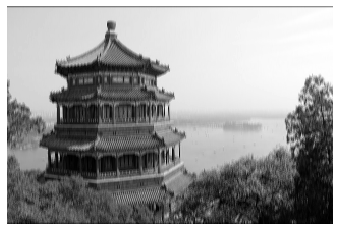

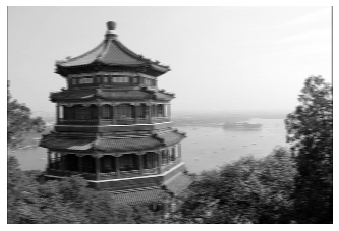

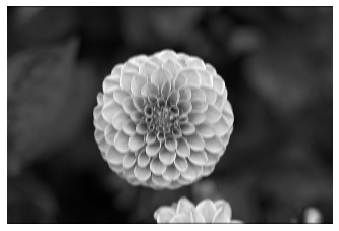

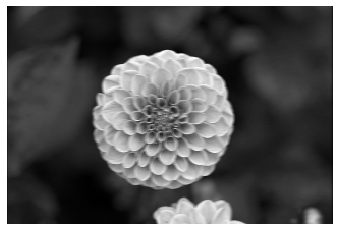

In [19]:
for image_index in (0,1):
    for feature_map_index in (0,1):
        plot_image(output[image_index,:,:,feature_map_index])
        plt.show()

In [20]:
flower[:,:,2].shape

(427, 640)

In [21]:
dataset.shape

(2, 427, 640, 3)

In [22]:
channels

3

using tf.layers.conv2d()

In [23]:
reset_graph()

X = tf.placeholder(shape=(None,height,width,channels),dtype=tf.float32)
conv = tf.layers.conv2d(X,filters=2, kernel_size=4, strides=[3,3],padding='SAME')

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [24]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    output = sess.run(conv, feed_dict={X:dataset})

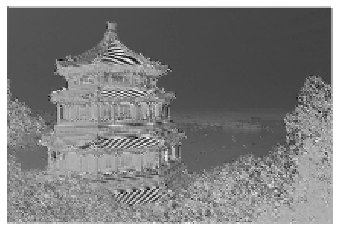

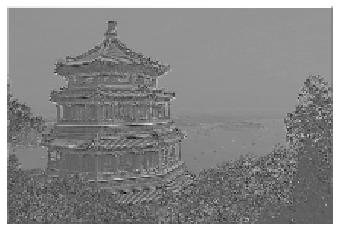

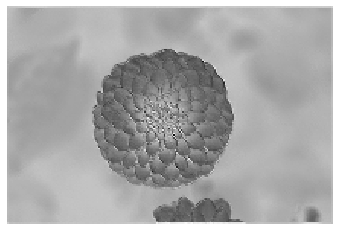

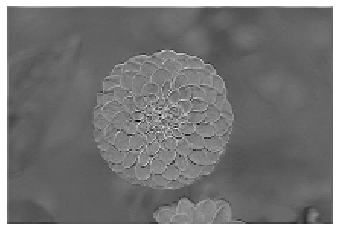

In [25]:
for image_index in (0,1):
    for feature_map_index in (0,1):
        plot_image(output[image_index,:,:,feature_map_index])
        plt.show()

## VALID vs SAME padding

In [26]:
reset_graph()

filter_primes = np.array([2., 3., 5., 7., 11., 13.], dtype=np.float32)
x = tf.constant(np.arange(1,13+1,dtype=np.float32).reshape([1,1,13,1]))
filters = tf.constant(filter_primes.reshape(1,6,1,1))

valid_conv = tf.nn.conv2d(x,filters,strides=[1,1,5,1],padding='VALID')
same_conv = tf.nn.conv2d(x,filters,strides=[1,1,5,1],padding='SAME')

In [27]:
with tf.Session() as sess:
    print('Valid:\n',valid_conv.eval())
    print('Same:\n', same_conv.eval())
    print(x.eval())

Valid:
 [[[[184.]
   [389.]]]]
Same:
 [[[[143.]
   [348.]
   [204.]]]]
[[[[ 1.]
   [ 2.]
   [ 3.]
   [ 4.]
   [ 5.]
   [ 6.]
   [ 7.]
   [ 8.]
   [ 9.]
   [10.]
   [11.]
   [12.]
   [13.]]]]


In [28]:
print("VALID:")
print(np.array([1,2,3,4,5,6]).T.dot(filter_primes))
print(np.array([6,7,8,9,10,11]).T.dot(filter_primes))
print("SAME:")
print(np.array([0,1,2,3,4,5]).T.dot(filter_primes))
print(np.array([5,6,7,8,9,10]).T.dot(filter_primes))
print(np.array([10,11,12,13,0,0]).T.dot(filter_primes))

VALID:
184.0
389.0
SAME:
143.0
348.0
204.0


## Pooling Layer

In [29]:
batch_size, height, width, channels = dataset.shape

In [30]:
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

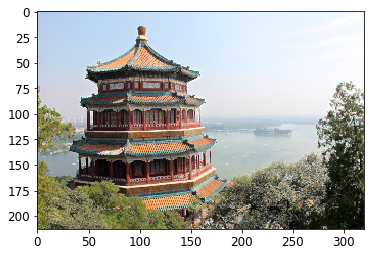

In [31]:
X = tf.placeholder(tf.float32,shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict = {X:dataset})
    
plt.imshow(output[0].astype(np.uint8))
plt.show()

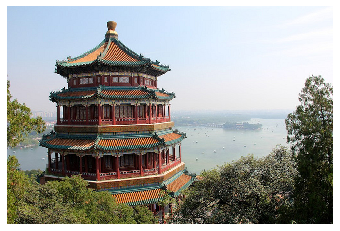

In [32]:
plot_image(china)

note that pooling just pretty much makes the image look brighter

# MNIST

Note: instead of using the fully_connected(), conv2d() and dropout() functions from the tensorflow.contrib.layers module (as in the book), we now use the dense(), conv2d() and dropout() functions (respectively) from the tf.layers module, which did not exist when this chapter was written. This is preferable because anything in contrib may change or be deleted without notice, while tf.layers is part of the official API. As you will see, the code is mostly the same.

For all these functions:

the scope parameter was renamed to name, and the _fn suffix was removed in all the parameters that had it (for example the activation_fn parameter was renamed to activation).
The other main differences in tf.layers.dense() are:

the weights parameter was renamed to kernel (and the weights variable is now named "kernel" rather than "weights"),
the default activation is None instead of tf.nn.relu
The other main differences in tf.layers.conv2d() are:

the num_outputs parameter was renamed to filters,
the stride parameter was renamed to strides,
the default activation is now None instead of tf.nn.relu.
The other main differences in tf.layers.dropout() are:

it takes the dropout rate (rate) rather than the keep probability (keep_prob). Of course, rate == 1 - keep_prob,
the is_training parameters was renamed to training.

In [50]:
height = 28
width = 28
channels = 1
n_inputs = height * width

conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 2
conv2_pad = "SAME"

pool3_fmaps = conv2_fmaps

n_fc1 = 64
n_outputs = 10

reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None], name="y")

conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")
conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 7 * 7])

with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat, n_fc1, activation=tf.nn.relu, name="fc1")

with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

    

In [51]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [52]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [53]:
import time

In [55]:
n_epochs = 13
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            a = time.time()
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            b = time.time()
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Last batch accuracy:", acc_batch, "Test accuracy:", acc_test, 'time', b-a)

        save_path = saver.save(sess, "./my_mnist_model")


0 Last batch accuracy: 0.97333336 Test accuracy: 0.9754 time 0.07899689674377441
1 Last batch accuracy: 0.97333336 Test accuracy: 0.9848 time 0.08092880249023438
2 Last batch accuracy: 0.9866667 Test accuracy: 0.9831 time 0.0806739330291748
3 Last batch accuracy: 0.9866667 Test accuracy: 0.9887 time 0.08582496643066406
4 Last batch accuracy: 0.99333334 Test accuracy: 0.9873 time 0.08142280578613281
5 Last batch accuracy: 0.99333334 Test accuracy: 0.9887 time 0.08240890502929688
6 Last batch accuracy: 1.0 Test accuracy: 0.9882 time 0.08559489250183105
7 Last batch accuracy: 1.0 Test accuracy: 0.9903 time 0.0818631649017334
8 Last batch accuracy: 0.99333334 Test accuracy: 0.9871 time 0.08461189270019531
9 Last batch accuracy: 1.0 Test accuracy: 0.9872 time 0.0803530216217041
10 Last batch accuracy: 1.0 Test accuracy: 0.9903 time 0.0802769660949707
11 Last batch accuracy: 1.0 Test accuracy: 0.9876 time 0.08311176300048828
12 Last batch accuracy: 1.0 Test accuracy: 0.9888 time 0.0819702148

# 7. High Accuracy CNN for MNIST


Build your own CNN and try to acheive the highest accuracy on MNIST

The following CNN is similar to the one defined above, except using stride 1 for the second convolutional layer (rather than 2) with 25% drop out after the second convolutional layer 50% dropout after the fully connected layer, and trained using early stopping. It achieve 99.2% on MNIST, its not state of the art, but can you do better

In [74]:
height = 28
width = 28
channels = 1
n_inputs = height * width

conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 1
conv2_pad = "SAME"
conv2_dropout_rate = 0.25

pool3_fmaps = conv2_fmaps

n_fc1 = 128
fc1_dropout_rate = 0.5

n_outputs = 10

reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None], name="y")
    training = tf.placeholder_with_default(False, shape=[], name='training')
    
conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")
conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 14 * 14])
    pool3_flat_drop = tf.layers.dropout(pool3_flat, conv2_dropout_rate, training=training)
    
with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat_drop, n_fc1, activation=tf.nn.relu, name="fc1")
    fc1_drop = tf.layers.dropout(fc1, fc1_dropout_rate, training=training)
    
with tf.name_scope("output"):
    logits = tf.layers.dense(fc1_drop, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")
    
with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()
    
    
    

lets define a few functions that gets the models stats (all the values of all the variables constant and trained) and the restore model params, which restores a previous state. This is used to speed up early stopping, instead of storing the ebst model found so far to disk, we just save it to memory

In [59]:
def get_model_params():
    gvars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
    return {gvar.op.name: value for gvar, 
            value in zip(gvars, tf.get_default_session().run(gvars))}

In [62]:
def restore_model_params(model_params):
    gvar_names = list(model_params.keys())
    assign_ops = {gvar_name:tf.get_default_graph().get_operation_by_name(gvar_name + 
                                                                         "/Assign") 
                                                                         for gvar_name in gvar_names}
    init_values = {gvar_name: assign_op.inputs[1] for gvar_name, 
                   assign_op in assign_ops.items()}
    feed_dict = {init_values[gvar_name]: model_params[gvar_name] for gvar_name in gvar_names}
    tf.get_default_session().run(assign_ops,feed_dict=feed_dict)
                                                                    

lets create a few saver functions too

In [63]:
from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

In [77]:
loss_summary = tf.summary.scalar('loss', loss)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

#lets record cross entropy too
xentropy_summary = tf.summary.tensor_summary('xentropy', xentropy)

In [78]:
n_epochs = 1000
batch_size = 125
iteration = 0

best_loss_val = np.infty
check_interval = 500
checks_since_last_progress = 0
max_checks_without_progress = 20
best_model_params = None 

with tf.Session() as sess:
    init.run()
    #time marker for first epoch
    t1 = time.time()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            iteration += 1
            summary_str = loss_summary.eval(feed_dict={X: X_batch, y: y_batch})
            file_writer.add_summary(summary_str, epoch)
            summary_str = xentropy_summary.eval(feed_dict={X: X_batch, y: y_batch})
            file_writer.add_summary(summary_str, epoch)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})
            if iteration % check_interval == 0:
                loss_val = loss.eval(feed_dict={X: X_valid, y: y_valid})
                if loss_val < best_loss_val:
                    best_loss_val = loss_val
                    checks_since_last_progress = 0
                    best_model_params = get_model_params()
                else:
                    checks_since_last_progress += 1
        #complete epoch end time
        end_times = time.time() - t1
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print("Epoch {}, last batch accuracy: {:.4f}%, valid. accuracy: {:.4f}%, valid. best loss: {:.6f}, time for epoch {:.4f}".format(
                  epoch, acc_batch * 100, acc_val * 100, best_loss_val,end_times))
        if checks_since_last_progress > max_checks_without_progress:
            print("Early stopping!")
            break

    if best_model_params:
        restore_model_params(best_model_params)
    acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
    print("Final accuracy on test set:", acc_test)
    save_path = saver.save(sess, "./my_mnist_model")

Epoch 0, last batch accuracy: 97.6000%, valid. accuracy: 98.0200%, valid. best loss: inf, time for epoch 115.6443
Epoch 1, last batch accuracy: 98.4000%, valid. accuracy: 98.6800%, valid. best loss: 0.063583, time for epoch 236.4881
Epoch 2, last batch accuracy: 96.8000%, valid. accuracy: 98.7800%, valid. best loss: 0.045973, time for epoch 356.8576
Epoch 3, last batch accuracy: 97.6000%, valid. accuracy: 99.0000%, valid. best loss: 0.040319, time for epoch 479.2495
Epoch 4, last batch accuracy: 97.6000%, valid. accuracy: 99.0600%, valid. best loss: 0.040319, time for epoch 604.2181
Epoch 5, last batch accuracy: 99.2000%, valid. accuracy: 99.0200%, valid. best loss: 0.033085, time for epoch 725.0533
Epoch 6, last batch accuracy: 99.2000%, valid. accuracy: 98.9200%, valid. best loss: 0.032070, time for epoch 843.6094
Epoch 7, last batch accuracy: 100.0000%, valid. accuracy: 99.0600%, valid. best loss: 0.032070, time for epoch 962.3936
Epoch 8, last batch accuracy: 99.2000%, valid. accur

In [70]:
a = time.time()

In [71]:
b = time.time()

In [72]:
b - a

1.1650011539459229

In [79]:
tf.VERSION

'1.15.0'

# classifying a large image using inception v3
Exercise: Download some images of various animals. Load them in Python, for example using the matplotlib.image.mpimg.imread() function or the scipy.misc.imread() function. Resize and/or crop them to 299 × 299 pixels, and ensure that they have just three channels (RGB), with no transparency channel. The images that the Inception model was trained on were preprocessed so that their values range from -1.0 to 1.0, so you must ensure that your images do too.

In [127]:
width = 299
height = 299
channels = 3

import imageio

im = imageio.imread('test_image.png')
print(im.shape)

(215, 215, 4)


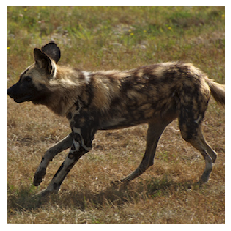

In [128]:
plt.imshow(im[:,:,:channels])
plt.axis("off")
plt.show()

In [129]:
#convert to 3 rgb
test_image = im[:,:,:channels]

In [130]:
test_image[:,:,0].shape

(215, 215)

In [117]:
#padd to get to 299 by 3
#add 42 around border

image_stack = np.zeros((215, 215, 3))

extra_left, extra_right = 42, 42
extra_top, extra_bottom = 42, 42

test_image=np.pad(test_image, ((extra_left, extra_right), (extra_top, extra_bottom), (0, 0)),
       mode='constant', constant_values=3)

In [135]:
from skimage.transform import resize
test_image = resize(test_image, (299, 299))

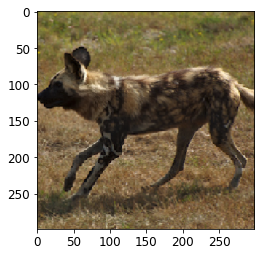

In [136]:
plt.imshow(test_image)

In [68]:
import sys
import tarfile
from six.moves import urllib

In [69]:
TF_MODELS_URL = "http://download.tensorflow.org/models"
INCEPTION_V3_URL = TF_MODELS_URL + "/inception_v3_2016_08_28.tar.gz"
INCEPTION_PATH = os.path.join("datasets", "inception")
INCEPTION_V3_CHECKPOINT_PATH = os.path.join(INCEPTION_PATH, "inception_v3.ckpt")

def download_progress(count, block_size, total_size):
    percent = count * block_size * 100 // total_size
    sys.stdout.write("\rDownloading: {}%".format(percent))
    sys.stdout.flush()

def fetch_pretrained_inception_v3(url=INCEPTION_V3_URL, path=INCEPTION_PATH):
    if os.path.exists(INCEPTION_V3_CHECKPOINT_PATH):
        return
    os.makedirs(path, exist_ok=True)
    tgz_path = os.path.join(path, "inception_v3.tgz")
    urllib.request.urlretrieve(url, tgz_path, reporthook=download_progress)
    inception_tgz = tarfile.open(tgz_path)
    inception_tgz.extractall(path=path)
    inception_tgz.close()
    os.remove(tgz_path)

In [70]:
fetch_pretrained_inception_v3()

In [71]:
import re

CLASS_NAME_REGEX = re.compile(r"^n\d+\s+(.*)\s*$", re.M | re.U)

def load_class_names():
    path = "imagenet_class_names.txt.rtf"
    with open(path,encoding='utf-8') as f:
        content = f.read()
        return(CLASS_NAME_REGEX.findall(content))

In [72]:
class_names = ["background"] + load_class_names()

In [73]:
class_names[:20]

['background',
 'goldfish, Carassius auratus\\',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias\\',
 'tiger shark, Galeocerdo cuvieri\\',
 'hammerhead, hammerhead shark\\',
 'electric ray, crampfish, numbfish, torpedo\\',
 'stingray\\',
 'cock\\',
 'hen\\',
 'ostrich, Struthio camelus\\',
 'brambling, Fringilla montifringilla\\',
 'goldfinch, Carduelis carduelis\\',
 'house finch, linnet, Carpodacus mexicanus\\',
 'junco, snowbird\\',
 'indigo bunting, indigo finch, indigo bird, Passerina cyanea\\',
 'robin, American robin, Turdus migratorius\\',
 'bulbul\\',
 'jay\\',
 'magpie\\',
 'chickadee\\']

## 8.3

Exercise: Create the Inception v3 model by calling the inception_v3() function, as shown below. This must be done within an argument scope created by the inception_v3_arg_scope() function. Also, you must set is_training=False and num_classes=1001 [...]

In [74]:
from tensorflow.contrib.slim.nets import inception
import tensorflow.contrib.slim as slim

In [77]:
reset_graph()

X = tf.placeholder(tf.float32, shape=[None, 299, 299, 3], name="X")
with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, end_points = inception.inception_v3(
        X, num_classes=1001, is_training=False)
predictions = end_points["Predictions"]
saver = tf.train.Saver()

## 8.4 

Open a session and use the Saver to restore the pretained model checkpoint that you downloaded earlier.

In [78]:
with tf.Session() as sess:
    saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)

INFO:tensorflow:Restoring parameters from datasets/inception/inception_v3.ckpt


## 8.5

Run the model to classifiy the images you prepared. Display the top five predictions from the model

In [137]:
X_test = test_image.reshape(-1,height,width,channels)

In [138]:
with tf.Session() as sess:
    saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)
    predictions_val = predictions.eval(feed_dict={X: X_test})

INFO:tensorflow:Restoring parameters from datasets/inception/inception_v3.ckpt


In [139]:
most_likely_class_index = np.argmax(predictions_val[0])
most_likely_class_index

276

In [140]:
class_names[most_likely_class_index]

'hyena, hyaena\\'

In [141]:
top_5 = np.argpartition(predictions_val[0], -5)[-5:]
top_5 = reversed(top_5[np.argsort(predictions_val[0][top_5])])
for i in top_5:
    print("{0}: {1:.2f}%".format(class_names[i], 100 * predictions_val[0][i]))

hyena, hyaena\: 94.24%
red fox, Vulpes vulpes\: 2.27%
beer bottle\: 0.05%
swing\: 0.05%
common newt, Triturus vulgaris\: 0.05%


## Transfer Learning for large image classification

Exercise: Create a training set containing at least 100 images per class. For example, you could classify your own pictures based on the location (beach, mountain, city, etc.), or alternatively you can just use an existing dataset, such as the flowers dataset or MIT's places dataset (requires registration, and it is huge).

Let's tackle the flowers dataset. First, we need to download it:

In [143]:
import sys
import tarfile
from six.moves import urllib

FLOWERS_URL = "http://download.tensorflow.org/example_images/flower_photos.tgz"
FLOWERS_PATH = 'flowers'

def fetch_flowers(url=FLOWERS_URL, path=FLOWERS_PATH):
    if os.path.exists(FLOWERS_PATH):
        return
    os.makedirs(path, exist_ok=True)
    tgz_path = os.path.join(path, "flower_photos.tgz")
    urllib.request.urlretrieve(url, tgz_path, reporthook=download_progress)
    flowers_tgz = tarfile.open(tgz_path)
    flowers_tgz.extractall(path=path)
    flowers_tgz.close()
    os.remove(tgz_path)

In [144]:
fetch_flowers()

In [148]:
flowers_root_path = 'flower_photos'
flower_classes = sorted([dirname for dirname in os.listdir(flowers_root_path)
                  if os.path.isdir(os.path.join(flowers_root_path, dirname))])
flower_classes

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

lets get the list of all the image files paths for each class

In [150]:
from collections import defaultdict

image_paths = defaultdict(list)

for flower_class in flower_classes:
    image_dir = os.path.join(flowers_root_path,flower_class)
    for filepath in os.listdir(image_dir):
        if filepath.endswith('jpg'):
            image_paths[flower_class].append(os.path.join(image_dir,filepath))

Lets sort the image paths just to make this notebook beahve across multiple runs

In [151]:
image_paths

defaultdict(list,
            {'daisy': ['flower_photos/daisy/14167534527_781ceb1b7a_n.jpg',
              'flower_photos/daisy/5512287917_9f5d3f0f98_n.jpg',
              'flower_photos/daisy/476857510_d2b30175de_n.jpg',
              'flower_photos/daisy/521762040_f26f2e08dd.jpg',
              'flower_photos/daisy/7320089276_87b544e341.jpg',
              'flower_photos/daisy/8008258043_5457dd254b_n.jpg',
              'flower_photos/daisy/721595842_bacd80a6ac.jpg',
              'flower_photos/daisy/8719756744_34a5a83976_n.jpg',
              'flower_photos/daisy/5110107234_12ddc0206b_m.jpg',
              'flower_photos/daisy/20773528301_008fcbc5a1_n.jpg',
              'flower_photos/daisy/144076848_57e1d662e3_m.jpg',
              'flower_photos/daisy/510844526_858b8fe4db.jpg',
              'flower_photos/daisy/5632774792_0fa33d17eb_n.jpg',
              'flower_photos/daisy/12891819633_e4c82b51e8.jpg',
              'flower_photos/daisy/7630517248_98fb8bee1f_n.jpg',
          

In [152]:
for paths in image_paths.values():
    paths.sort()

Class is  daisy


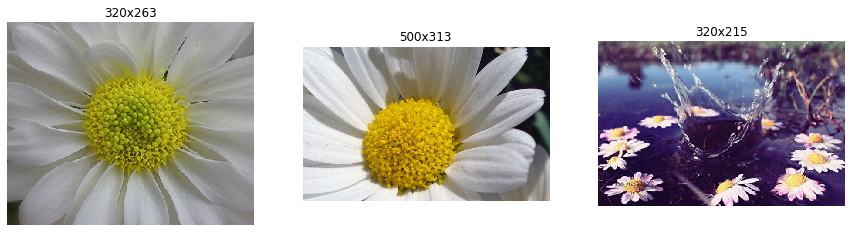

Class is  dandelion


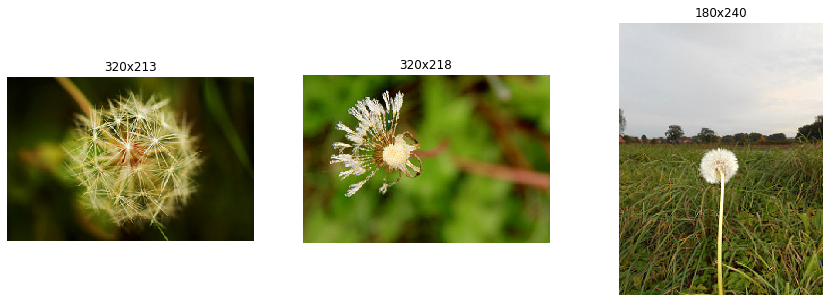

Class is  roses


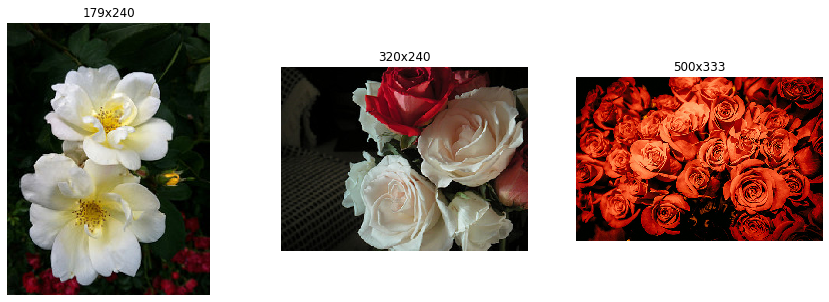

Class is  sunflowers


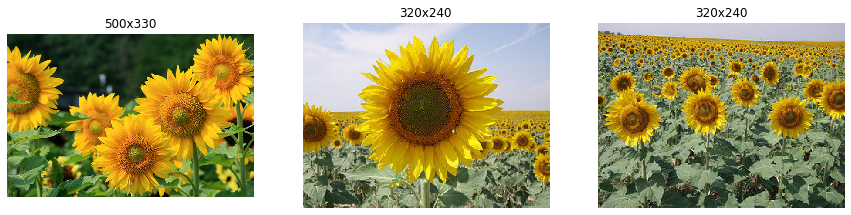

Class is  tulips


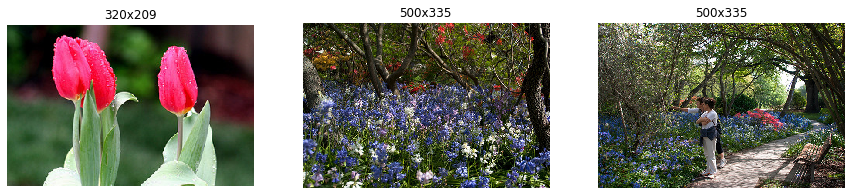

In [154]:
import matplotlib.image as mpimg

n_examples_per_class = 3

for flower_class in flower_classes:
    print('Class is ',flower_class)
    plt.figure(figsize=(15,5))
    for index, example_image_path in enumerate(image_paths[flower_class][:n_examples_per_class]):
        example_image = mpimg.imread(example_image_path)[:, :, :channels]
        plt.subplot(100 + n_examples_per_class * 10 + index + 1)
        plt.title("{}x{}".format(example_image.shape[1], example_image.shape[0]))
        plt.imshow(example_image)
        plt.axis("off")
    plt.show()
        
        
        
        

## 9.2

Write a preprocessing step that will reszine and crop the iamge to 299X299 with some randomness for data augmentation

First, lets implement this using Numpy and Scipy

using basic NumPy slicing for image cropping,
NumPy's fliplr() function to flip the image horizontally (with 50% probability),
and SciPy's imresize() function for zooming.
Note that imresize() is based on the Python Image Library (PIL).

In [182]:
from skimage.transform import resize

def prepare_image(image, target_width = 299, target_height = 299, max_zoom = 0.2):
    '''Zooms and crops the image randomly for data augmentation'''
    
    #fist lets find the larget bouding box with the target size ratio that fits within the image
    height = image.shape[0]
    width = image.shape[1]
    image_ratio = width / height
    target_image_ratio = target_width / target_height
    #img ratio is less than target_image_ratio
    crop_vertically = image_ratio < target_image_ratio
    crop_width = width if crop_vertically else int(height * target_image_ratio)
    crop_height = int(width / target_image_ratio) if crop_vertically else height
    
    #shrink this bounding box by a random factor (div p dims by random number) 
    #between 1.0 and 1.0 max zoom
    resize_factor = np.random.rand()*max_zoom + 1.0
    crop_width = int(crop_width / resize_factor)
    crop_height = int(crop_height / resize_factor)
    
    #select a random location on image for bounding box
    x0 = np.random.randint(0, width - crop_width)
    y0 = np.random.randint(0, height - crop_height)
    x1 = x0 + crop_width
    y1 = y0 + crop_height
    
    #crop te aimge using the random bounding box we built
    image = image[y0:y1, x0:x1]
    
    #flip the image horizontally with 50% probablity
    if np.random.rand() < 0.5:
        image = np.fliplr(image)
        
    #now try to resixe to the target dimesinos
    #the rise funion to skiiamge autp this to floats from 0 to 1
    image = resize(image, (target_width,target_height))
    
    #return the image expressed as rgb
    return(image.astype(np.float32))
    
    
    
    

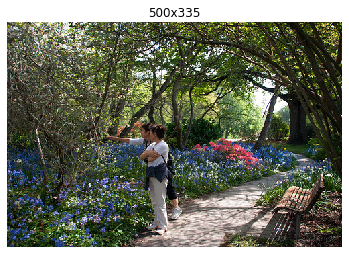

In [183]:
plt.figure(figsize=(6, 8))
plt.imshow(example_image)
plt.title("{}x{}".format(example_image.shape[1], example_image.shape[0]))
plt.axis("off")
plt.show()

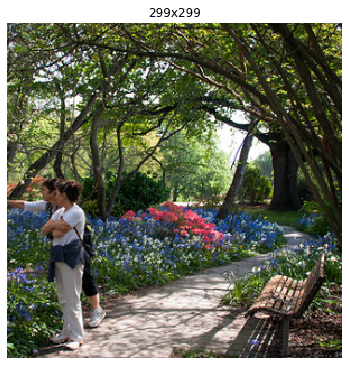

In [184]:
prepared_image = prepare_image(example_image)

plt.figure(figsize=(6, 8))
plt.imshow(prepared_image)
plt.title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
plt.axis("off")
plt.show()

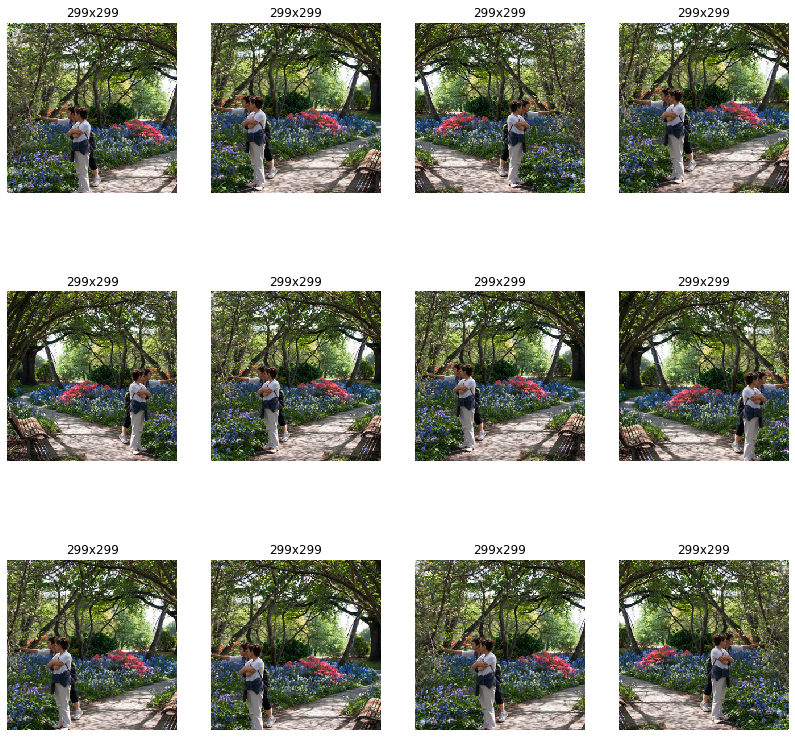

In [189]:
rows,cols = 3,4

plt.figure(figsize=(14, 14))
for row in range(rows):
    for col in range(cols):
        prepared_image = prepare_image(example_image)
        plt.subplot(rows, cols, row * cols + col + 1)
        plt.title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
        plt.imshow(prepared_image)
        plt.axis("off")
plt.show()

In [174]:
rows,cols = 2,3
for row in range(rows):
    for col in range(cols):
        print(rows,cols, row*cols + col + 1)

2 3 1
2 3 2
2 3 3
2 3 4
2 3 5
2 3 6


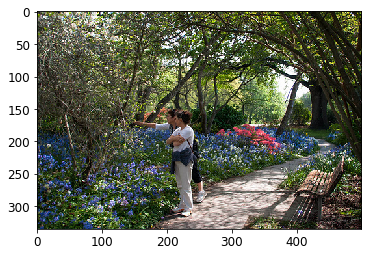

In [177]:
plt.imshow(example_image)

We could have also done this with tensorflow

In [192]:
def prepare_image_with_tensorflow(image, target_width = 299, target_height = 299, max_zoom = 0.2):
    """Zooms and crops the image randomly for data augmentation."""

    # First, let's find the largest bounding box with the target size ratio that fits within the image
    image_shape = tf.cast(tf.shape(image), tf.float32)
    height = image_shape[0]
    width = image_shape[1]
    image_ratio = width / height
    target_image_ratio = target_width / target_height
    crop_vertically = image_ratio < target_image_ratio
    crop_width = tf.cond(crop_vertically,
                         lambda: width,
                         lambda: height * target_image_ratio)
    crop_height = tf.cond(crop_vertically,
                          lambda: width / target_image_ratio,
                          lambda: height)

    # Now let's shrink this bounding box by a random factor (dividing the dimensions by a random number
    # between 1.0 and 1.0 + `max_zoom`.
    resize_factor = tf.random_uniform(shape=[], minval=1.0, maxval=1.0 + max_zoom)
    crop_width = tf.cast(crop_width / resize_factor, tf.int32)
    crop_height = tf.cast(crop_height / resize_factor, tf.int32)
    box_size = tf.stack([crop_height, crop_width, 3])   # 3 = number of channels

    # Let's crop the image using a random bounding box of the size we computed
    image = tf.random_crop(image, box_size)

    # Let's also flip the image horizontally with 50% probability:
    image = tf.image.random_flip_left_right(image)

    # The resize_bilinear function requires a 4D tensor (a batch of images)
    # so we need to expand the number of dimensions first:
    image_batch = tf.expand_dims(image, 0)

    # Finally, let's resize the image to the target dimensions. Note that this function
    # returns a float32 tensor.
    image_batch = tf.image.resize_bilinear(image_batch, [target_height, target_width])
    image = image_batch[0] / 255  # back to a single image, and scale the colors from 0.0 to 1.0
    return image

test the function

In [1]:
reset_graph()

input_image = tf.placeholder(tf.uint8, shape=[None, None, 3])
prepared_image_op = prepare_image_with_tensorflow(input_image)

with tf.Session():
    prepared_image = prepared_image_op.eval(feed_dict={input_image: example_image})
    
plt.figure(figsize=(6, 6))
plt.imshow(prepared_image)
plt.title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
plt.axis("off")
plt.show()

NameError: name 'reset_graph' is not defined

## 9.3 

Using the pretrained version of v2, model from the previous exercise, freeze all layers up the bottleneck layer (the last layer before the output layer) and repalce the output layer with the appropriate number of outputs for your new classication task (eg the flower dataset has five mutally exlucsive classes so the ouput layer must have five nuerons and we will use the sofmax)

Lets start by fetching the inception v3 grpah again. this time use trainign placeholde that will tell tensorflow whether we are training the network or not (this is needed by operations such as dropout and bacth norm)

In [264]:
from tensorflow.contrib.slim.nets import inception
import tensorflow.contrib.slim as slim

reset_graph()

X = tf.placeholder(tf.float32, shape=[None, height, width, channels], name="X")
training = tf.placeholder_with_default(False, shape=[])
with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, end_points = inception.inception_v3(X, num_classes=1001, is_training=training)

inception_saver = tf.train.Saver()

Now we need to find the point in the gprahy where we should attach a new output layer. It should be the layer right before the current output layer. One way to this is to explore the layers inputs

In [265]:
logits.op.inputs[0]

<tf.Tensor 'InceptionV3/Logits/Conv2d_1c_1x1/BiasAdd:0' shape=(?, 1, 1, 1001) dtype=float32>

This is still part of the output layer, go back one more

In [266]:
logits.op.inputs[0].op.inputs[0]

<tf.Tensor 'InceptionV3/Logits/Conv2d_1c_1x1/Conv2D:0' shape=(?, 1, 1, 1001) dtype=float32>

In [267]:
tf.get_default_graph().get_operations()

[<tf.Operation 'X' type=Placeholder>,
 <tf.Operation 'PlaceholderWithDefault/input' type=Const>,
 <tf.Operation 'PlaceholderWithDefault' type=PlaceholderWithDefault>,
 <tf.Operation 'InceptionV3/Conv2d_1a_3x3/weights/Initializer/truncated_normal/shape' type=Const>,
 <tf.Operation 'InceptionV3/Conv2d_1a_3x3/weights/Initializer/truncated_normal/mean' type=Const>,
 <tf.Operation 'InceptionV3/Conv2d_1a_3x3/weights/Initializer/truncated_normal/stddev' type=Const>,
 <tf.Operation 'InceptionV3/Conv2d_1a_3x3/weights/Initializer/truncated_normal/TruncatedNormal' type=TruncatedNormal>,
 <tf.Operation 'InceptionV3/Conv2d_1a_3x3/weights/Initializer/truncated_normal/mul' type=Mul>,
 <tf.Operation 'InceptionV3/Conv2d_1a_3x3/weights/Initializer/truncated_normal' type=Add>,
 <tf.Operation 'InceptionV3/Conv2d_1a_3x3/weights' type=VariableV2>,
 <tf.Operation 'InceptionV3/Conv2d_1a_3x3/weights/Assign' type=Assign>,
 <tf.Operation 'InceptionV3/Conv2d_1a_3x3/weights/read' type=Identity>,
 <tf.Operation 'In

In [268]:
tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)

[<tf.Variable 'InceptionV3/Conv2d_1a_3x3/weights:0' shape=(3, 3, 3, 32) dtype=float32_ref>,
 <tf.Variable 'InceptionV3/Conv2d_1a_3x3/BatchNorm/beta:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'InceptionV3/Conv2d_2a_3x3/weights:0' shape=(3, 3, 32, 32) dtype=float32_ref>,
 <tf.Variable 'InceptionV3/Conv2d_2a_3x3/BatchNorm/beta:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'InceptionV3/Conv2d_2b_3x3/weights:0' shape=(3, 3, 32, 64) dtype=float32_ref>,
 <tf.Variable 'InceptionV3/Conv2d_2b_3x3/BatchNorm/beta:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'InceptionV3/Conv2d_3b_1x1/weights:0' shape=(1, 1, 64, 80) dtype=float32_ref>,
 <tf.Variable 'InceptionV3/Conv2d_3b_1x1/BatchNorm/beta:0' shape=(80,) dtype=float32_ref>,
 <tf.Variable 'InceptionV3/Conv2d_4a_3x3/weights:0' shape=(3, 3, 80, 192) dtype=float32_ref>,
 <tf.Variable 'InceptionV3/Conv2d_4a_3x3/BatchNorm/beta:0' shape=(192,) dtype=float32_ref>,
 <tf.Variable 'InceptionV3/Mixed_5b/Branch_0/Conv2d_0a_1x1/weights:0' shape=(1,

In [269]:
logits.op.inputs[0].op.inputs[0].op.inputs[0]

<tf.Tensor 'InceptionV3/Logits/Dropout_1b/cond/Merge:0' shape=(?, 1, 1, 2048) dtype=float32>

In [270]:
end_points

{'Conv2d_1a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_1a_3x3/Relu:0' shape=(?, 149, 149, 32) dtype=float32>,
 'Conv2d_2a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_2a_3x3/Relu:0' shape=(?, 147, 147, 32) dtype=float32>,
 'Conv2d_2b_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_2b_3x3/Relu:0' shape=(?, 147, 147, 64) dtype=float32>,
 'MaxPool_3a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/MaxPool_3a_3x3/MaxPool:0' shape=(?, 73, 73, 64) dtype=float32>,
 'Conv2d_3b_1x1': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_3b_1x1/Relu:0' shape=(?, 73, 73, 80) dtype=float32>,
 'Conv2d_4a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_4a_3x3/Relu:0' shape=(?, 71, 71, 192) dtype=float32>,
 'MaxPool_5a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/MaxPool_5a_3x3/MaxPool:0' shape=(?, 35, 35, 192) dtype=float32>,
 'Mixed_5b': <tf.Tensor 'InceptionV3/InceptionV3/Mixed_5b/concat:0' shape=(?, 35, 35, 256) dtype=float32>,
 'Mixed_5c': <tf.Tensor 'InceptionV3/InceptionV3/Mixed_5c/concat:0' shape=(?,

We need the prelogits endpoints

In [271]:
end_points['PreLogits']

<tf.Tensor 'InceptionV3/Logits/Dropout_1b/cond/Merge:0' shape=(?, 1, 1, 2048) dtype=float32>

We can drop the 2nd and 3rd dimenions usting the tf.squeeze() function

In [272]:
prelogits = tf.squeeze(end_points['PreLogits'],axis=[1,2])

In [273]:
prelogits

<tf.Tensor 'Squeeze:0' shape=(?, 2048) dtype=float32>

Add the finall fully connect layer on top

In [274]:
n_outputs = len(flower_classes)

with tf.name_scope('new_output_layer'):
    flower_logits = tf.layers.dense(prelogits,n_outputs,name='flower_logits')
    Y_proba = tf.nn.softmax(flower_logits,name='Y_proba')

Add in the remaining pieces,
* placeholder for targest y
* loss function, which is just cat cross entropy
* optimizer, that we use to create a training operation that will minimize cost
* operations to measure the models acc
* initializer and saver

Only want ot train the output layer (all other layers must be frozen) we must pass the list of variables to train to the optimizers minimize() method

In [276]:
y = tf.placeholder(tf.int32,shape=[None])

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=flower_logits,labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    flower_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='flower_logits')
    training_op = optimizer.minimize(loss, var_list=flower_vars)
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(flower_logits,y,1)
    accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))
    
with tf.name_scope('init_and_save'):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

In [277]:
[v.name for v in flower_vars]

['flower_logits/kernel:0', 'flower_logits/bias:0']

Note the we created the inception layer saver before adding the new output layer, we wuse tis saver to restore the pretraiend model state, so we don't it to try restore new varsiables (it would just fall saying ti dow not know the new variables). The second saver will be sued to save the final flower model, including both the pretrained vars and the new oncs

## 9.4 

Split the dataset into a training and a test set.

In [278]:
flower_class_ids = {flower_class: index for index, flower_class in enumerate(flower_classes)}
flower_class_ids

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

Shuffle the dataset and represent it as a list of filepath/class pairs

In [280]:
flower_paths_and_classes = []
for flower_class, paths in image_paths.items():
    for path in paths:
        flower_paths_and_classes.append((path, flower_class_ids[flower_class]))

In [281]:
flower_paths_and_classes

[('flower_photos/daisy/100080576_f52e8ee070_n.jpg', 0),
 ('flower_photos/daisy/10140303196_b88d3d6cec.jpg', 0),
 ('flower_photos/daisy/10172379554_b296050f82_n.jpg', 0),
 ('flower_photos/daisy/10172567486_2748826a8b.jpg', 0),
 ('flower_photos/daisy/10172636503_21bededa75_n.jpg', 0),
 ('flower_photos/daisy/102841525_bd6628ae3c.jpg', 0),
 ('flower_photos/daisy/1031799732_e7f4008c03.jpg', 0),
 ('flower_photos/daisy/10391248763_1d16681106_n.jpg', 0),
 ('flower_photos/daisy/10437754174_22ec990b77_m.jpg', 0),
 ('flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg', 0),
 ('flower_photos/daisy/10437929963_bc13eebe0c.jpg', 0),
 ('flower_photos/daisy/10466290366_cc72e33532.jpg', 0),
 ('flower_photos/daisy/10466558316_a7198b87e2.jpg', 0),
 ('flower_photos/daisy/10555749515_13a12a026e.jpg', 0),
 ('flower_photos/daisy/10555815624_dc211569b0.jpg', 0),
 ('flower_photos/daisy/10555826524_423eb8bf71_n.jpg', 0),
 ('flower_photos/daisy/10559679065_50d2b16f6d.jpg', 0),
 ('flower_photos/daisy/105806915_a9c13e

In [282]:
test_ratio = 0.2
train_size = int(len(flower_paths_and_classes)*(1-test_ratio))

np.random.shuffle(flower_paths_and_classes)

flower_paths_and_classes_train = flower_paths_and_classes[:train_size]
flower_paths_and_classes_test = flower_paths_and_classes[train_size:]

In [283]:
flower_paths_and_classes_train[:5]

[('flower_photos/daisy/19834392829_7d697871f6.jpg', 0),
 ('flower_photos/sunflowers/5957007921_62333981d2_n.jpg', 3),
 ('flower_photos/tulips/7166635566_ee240b5408_n.jpg', 4),
 ('flower_photos/dandelion/3446018470_0c40e73ed6_m.jpg', 1),
 ('flower_photos/dandelion/3533075436_0954145b9f_m.jpg', 1)]

Create function that pre processes the data 

In [284]:
from random import sample

def prepare_batch(flower_paths_and_classes, batch_size):
    batch_paths_and_classes = sample(flower_paths_and_classes, batch_size)
    images = [mpimg.imread(path)[:, :, :channels] for path, labels in batch_paths_and_classes]
    prepared_images = [prepare_image(image) for image in images]
    X_batch = 2 * np.stack(prepared_images) - 1 # Inception expects colors ranging from -1 to 1
    y_batch = np.array([labels for path, labels in batch_paths_and_classes], dtype=np.int32)
    return X_batch, y_batch



In [285]:
X_batch,y_batch = prepare_batch(flower_paths_and_classes_train,batch_size=4)

In [286]:
X_batch.shape

(4, 299, 299, 3)

In [287]:
X_batch.dtype

dtype('float32')

In [288]:
y_batch.shape

(4,)

In [289]:
y_batch.dtype

dtype('int32')

In [290]:
X_test, y_test = prepare_batch(flower_paths_and_classes_test, 
                               batch_size=len(flower_paths_and_classes_test))

In [291]:
X_test.shape

(734, 299, 299, 3)

Note: we could have pres the train set in the same way, but it would only make oe variant for each image, instead gnerate the training abtches on the fly during training, so that data augementation will be better with many variatns of each image


In [256]:
X_test, y_test = prepare_batch(flower_paths_and_classes_test,
                               batch_size=len(flower_paths_and_classes_test))

In [292]:
X_test.shape

(734, 299, 299, 3)

In [293]:
import time

this could take a realy long time...

In [294]:
n_epochs = 10
batch_size = 45
n_iterations_per_epoch = len(flower_paths_and_classes_train) // batch_size

with tf.Session() as sess:
    init.run()
    inception_saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)

    for epoch in range(n_epochs):
        #start time at epoch
        t1 = time.time()
        print("Epoch", epoch, end="")
        for iteration in range(n_iterations_per_epoch):
            print(".", end="")
            X_batch, y_batch = prepare_batch(flower_paths_and_classes_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})
        #get epoch end time
        end_time = time.time() - t1

        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        print("  Last batch accuracy:", acc_batch)
        print('Training time at epoch ',epoch, 'is ', end_time)

        save_path = saver.save(sess, "./my_flowers_model")

INFO:tensorflow:Restoring parameters from datasets/inception/inception_v3.ckpt
Epoch 0.................................................................  Last batch accuracy: 0.6
Training time at epoch  0 is  448.32077288627625
Epoch 1.................................................................  Last batch accuracy: 0.6
Training time at epoch  1 is  429.6390881538391
Epoch 2.................................................................  Last batch accuracy: 0.6666667
Training time at epoch  2 is  429.98028016090393
Epoch 3.................................................................  Last batch accuracy: 0.6
Training time at epoch  3 is  431.86579990386963
Epoch 4.................................................................  Last batch accuracy: 0.6
Training time at epoch  4 is  435.41191387176514
Epoch 5.................................................................  Last batch accuracy: 0.6
Training time at epoch  5 is  428.0003499984741
Epoch 6......................

In [295]:
n_test_batches = 10
X_test_batches = np.array_split(X_test, n_test_batches)
y_test_batches = np.array_split(y_test, n_test_batches)

with tf.Session() as sess:
    saver.restore(sess, "./my_flowers_model")

    print("Computing final accuracy on the test set (this will take a while)...")
    acc_test = np.mean([
        accuracy.eval(feed_dict={X: X_test_batch, y: y_test_batch})
        for X_test_batch, y_test_batch in zip(X_test_batches, y_test_batches)])
    print("Test accuracy:", acc_test)

INFO:tensorflow:Restoring parameters from ./my_flowers_model
Computing final accuracy on the test set (this will take a while)...
Test accuracy: 0.6415957


Lets use restore and try to train for two more epochs

In [296]:
n_epochs = 2
batch_size = 45
n_iterations_per_epoch = len(flower_paths_and_classes_train) // batch_size

with tf.Session() as sess:
    init.run()
    saver.restore(sess, "./my_flowers_model")

    for epoch in range(n_epochs):
        #start time at epoch
        t1 = time.time()
        print("Epoch", epoch, end="")
        for iteration in range(n_iterations_per_epoch):
            print(".", end="")
            X_batch, y_batch = prepare_batch(flower_paths_and_classes_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})
        #get epoch end time
        end_time = time.time() - t1

        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        print("  Last batch accuracy:", acc_batch)
        print('Training time at epoch ',epoch, 'is ', end_time)

        save_path = saver.save(sess, "./my_flowers_model")

INFO:tensorflow:Restoring parameters from ./my_flowers_model
Epoch 0.................................................................  Last batch accuracy: 0.5555556
Training time at epoch  0 is  435.71722292900085
Epoch 1.................................................................  Last batch accuracy: 0.6888889
Training time at epoch  1 is  430.14501881599426


Test one more time after 12 epochs of trainging

In [297]:
n_test_batches = 15
X_test_batches = np.array_split(X_test, n_test_batches)
y_test_batches = np.array_split(y_test, n_test_batches)

with tf.Session() as sess:
    saver.restore(sess, "./my_flowers_model")

    print("Computing final accuracy on the test set (this will take a while)...")
    acc_test = np.mean([
        accuracy.eval(feed_dict={X: X_test_batch, y: y_test_batch})
        for X_test_batch, y_test_batch in zip(X_test_batches, y_test_batches)])
    print("Test accuracy:", acc_test)

INFO:tensorflow:Restoring parameters from ./my_flowers_model
Computing final accuracy on the test set (this will take a while)...
Test accuracy: 0.6622166


In [298]:
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

In [301]:
z.shape

(64, 3, 32, 10)